In [307]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import os
import math

**Let's get ourseves a sample dataset.**

In [240]:
housing = pd.read_csv(os.path.join("datasets", "housing.csv"))

Let's take a few features.

In [241]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [869]:
dataset = housing.copy()
dataset = dataset.iloc[np.random.permutation(len(dataset))[:300]]

In [870]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4514,-118.20,34.04,52.0,1249.0,307.0,1223.0,297.0,2.0700,136300.0,<1H OCEAN
9962,-122.23,38.33,31.0,3440.0,574.0,1538.0,537.0,5.5368,325900.0,NEAR BAY
13905,-116.44,34.12,18.0,5584.0,1303.0,2250.0,1158.0,1.5823,72400.0,INLAND
1721,-122.39,38.00,33.0,44.0,6.0,23.0,11.0,4.1250,212500.0,NEAR BAY
5958,-117.82,34.12,26.0,3118.0,528.0,1546.0,545.0,5.2700,209400.0,INLAND


In [871]:
y_target = dataset.pop("median_house_value")

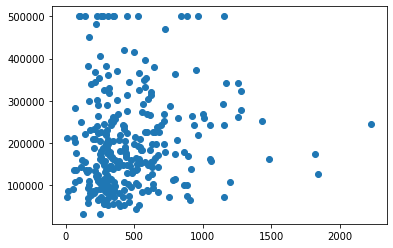

In [872]:
plt.scatter(dataset["households"], y_target)

Text(0, 0.5, 'median_house_value')

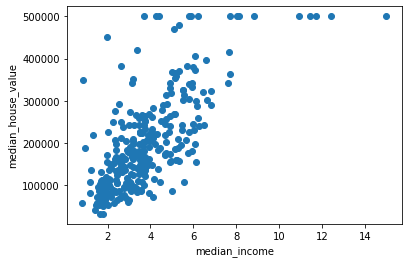

In [873]:
plt.scatter(dataset["median_income"], y_target)
plt.xlabel("median_income")
plt.ylabel("median_house_value")

We can see that does not hold the properties of independent and identically distributed (IID).

In [874]:
# we see that there are 5 categories of ocean_proximity with their counts respectively.

unique_op, counts = np.unique(dataset["ocean_proximity"], return_counts=True)
for op, c in zip(unique_op, counts):
    print(op, "has", c)

<1H OCEAN has 136
INLAND has 101
NEAR BAY has 30
NEAR OCEAN has 33


In [875]:
# one hot encoding

for op in unique_op:
    dataset[op] = np.zeros(len(dataset))
    w_t = np.where(dataset["ocean_proximity"] == op)[0]
    dataset[op].iloc[w_t] = 1

/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [876]:
# check one hot encoding
for op in unique_op:
    print(op, "has", dataset[op].sum())

<1H OCEAN has 136.0
INLAND has 101.0
NEAR BAY has 30.0
NEAR OCEAN has 33.0


In [1421]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
4514,-118.20,34.04,52.0,1249.0,307.0,1223.0,297.0,2.0700,<1H OCEAN,1.0,0.0,0.0,0.0
9962,-122.23,38.33,31.0,3440.0,574.0,1538.0,537.0,5.5368,NEAR BAY,0.0,0.0,1.0,0.0
13905,-116.44,34.12,18.0,5584.0,1303.0,2250.0,1158.0,1.5823,INLAND,0.0,1.0,0.0,0.0
1721,-122.39,38.00,33.0,44.0,6.0,23.0,11.0,4.1250,NEAR BAY,0.0,0.0,1.0,0.0
5958,-117.82,34.12,26.0,3118.0,528.0,1546.0,545.0,5.2700,INLAND,0.0,1.0,0.0,0.0


In [877]:
FEATURES = list(dataset.columns)
FEATURES.remove("ocean_proximity")
FEATURES

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 '<1H OCEAN',
 'INLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [878]:
X = dataset["median_income"].values
y = y_target.values

Train test split.

In [879]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)

In [880]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((225,), (75,), (225,), (75,))

**Univariate linear regression.**

In [881]:
class UniLinearRegression:
    
    def __init__(self):
        self.b_1 = None
        self.b_0 = None
        
    def fit(self, X, Y):
        self.b_1 = np.sum((X - X.mean()) * (Y - Y.mean())) / np.sum((X - X.mean())**2)
        self.b_0 = Y.mean() - self.b_1 * X.mean()
        
    def predict(self, X):
        return self.b_1 * X + self.b_0

    
def RSS(y_pred, y):
    return np.sum((y_pred - y)**2)

Let's fit and predict our univariate regression with the data using the feature "median_income".

In [882]:
X_train[:10]

array([2.4615, 3.7273, 3.4005, 2.6611, 2.2679, 6.1001, 5.5368, 4.9205,
       4.2414, 3.025 ])

In [883]:
uni_linear_reg = UniLinearRegression()

uni_linear_reg.fit(X_train, y_train)

In [884]:
y_pred = uni_linear_reg.predict(X_test)

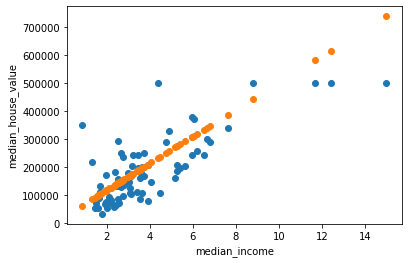

In [885]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred)
plt.xlabel("median_income")
plt.ylabel("median_house_value")
plt.show()

In [886]:
print(f"The equation of the line y = {uni_linear_reg.b_1} * x + {uni_linear_reg.b_0}")

The equation of the line y = 47783.68267459836 * x + 23118.213813221868


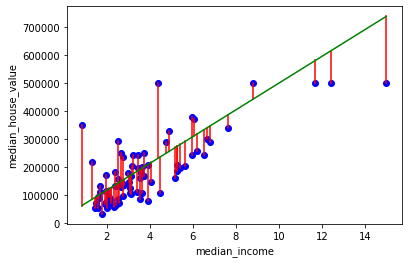

In [887]:
minimum, maximum = X_test.min(), X_test.max()
for x_p, y_p, y in zip(X_test, y_pred, y_test):
    plt.plot([x_p, x_p], [y_p, y], color="red")
plt.scatter(X_test, y_test, color="blue")
plt.plot([minimum, maximum], [uni_linear_reg.predict(minimum), uni_linear_reg.predict(maximum)], color="green")
plt.xlabel("median_income")
plt.ylabel("median_house_value")
plt.show()

In [888]:
print("RSS loss is", RSS(y_pred, y_test))

RSS loss is 509278841427.3958


To compute the standart errors of the estomators we would need ε(epsilon, the measurmement of the standart error(randomness) of the dataset).

$$
    σ^2 = Var(ε)
$$

$$
    SE(b_{1})^{2} = \frac{σ^2}{\sum_{i=1}{(x_{i}-x_{mean}})^{2}}
$$

$$
    SE(b_{0})^{2} = σ^2[\frac{1}{n} + \frac{x_{mean}^{2}}{\sum_{i=1}{(x_{i}-x_{mean}})^{2}}]
$$

where, n is the size of the samples.

These standart errors can be used to compute the **confidence intervals**.

For example 95% confidence interval is defined to be a range chick has the true value of the estimaor for 95% accuracy.

In our case 

Stadart errors can also be used to do **Hypothesis testing**.

"null hypothesis"
H0 : There is no relationship between X and Y.

"alternative hypothesis"
HA : There is some relationship between X and Y.

Mathematically

$$
    H_{0} : b_{i} = 0
$$

$$
    H_{1} : b_{i} = R/\{0\}
$$

Let's compute the value of SE.

This formula is found here. (this is not a reliable source) https://www.calculatorsoup.com/calculators/statistics/variance-calculator.php
$$
    Variance = σ^2 = \frac{\sum{(x_{i} - 𝜇})^{2}}{n}
$$

In [366]:
variance = np.sum((X - X.mean())**2) / len(X)
std_dev = variance**0.5
print("standard deviation is", std_dev)

standard deviation is 2.1970249277389238


In [367]:
SE_b_1 = math.sqrt(std_dev**2 / np.sum((X - X.mean())**2))
SE_b_0 = math.sqrt(std_dev**2 * ( (1 / len(X)) + X.mean() / np.sum((X - X.mean())**2) ))

SE_b_1, SE_b_0

(0.05773502691896258, 0.17065395004484846)

We can say that the true value of b_1 and b_2 in some probability in the range.

$$
    b_{1actual} = b_{1} + (-) 2*0.05773
$$

$$
    b_{0actual} = b_{0} + (-) 2*0.17065
$$


In our case the "null hypothesis" is wrong.

In [368]:
uni_linear_reg.b_1 == 0

False

To test the null hypothesis, let's compute a t-statistic.

$$
    t = \frac{b_{i} - 0}{SE(b_{i})}
$$

In [369]:
t_stat = uni_linear_reg.b_1 / SE_b_1
t_stat

590355.690120694

t_statistic is important because if b_1 is smaller than SE_b_1, then it is possible that the estimator has learned from some randomness of the data not an actual pattern.

R_squared.

$$
    R^2 = \frac{TSS - RSS}{TSS} = 1 - \frac{RSS}{TSS}
$$

$$
    TSS = \sum{(y_{i} - y_{mean})^2}
$$

In [370]:
def TSS(y_ac):
    return np.sum((y_ac - y_ac.mean())**2)

y_tss = TSS(y_target)
R_squared = 1 - (RSS(y_pred, y_test) / y_tss)
R_squared

0.8674333773712838

## Multiple Linear Regression

In [1396]:
class MultiLinearRegression:
    
    def __init__(self, n):
        self.b = np.empty(n)
        self.b_0 = 0
        
        self.SE_b = np.empty(n)
        self.SE_b0 = 0
        
    def fit(self, X, Y):
        for i, x in enumerate(self.b):
            self.b[i] = np.sum((X[:, i] - X[:, i].mean()) * (Y - Y.mean())) / np.sum((X[:, i] - X[:, i].mean())**2)
        self.b_0 = Y.mean() - self.b.mean() * X.mean()
        
    def predict(self, X):
        return np.dot(X, self.b.T) + self.b_0

In [1422]:
X = dataset[["population", "households", "median_income", "<1H OCEAN", "INLAND", "NEAR BAY", "NEAR OCEAN"]].values
y = y_target.values

In [1423]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)
X_train.shape, X_test.shape

((225, 7), (75, 7))

In [1424]:
mul_linear_reg = MultiLinearRegression(7)

mul_linear_reg.fit(X_train, y_train)

[ 4.16585249e+00  3.67779014e+01  4.09838694e+04  5.41259668e+04
 -1.20598566e+05  9.84584371e+04  4.54632832e+04] -4025739.9636478825


In [1436]:
print(f"The equation of the line.")
print("y =", " + ".join([f'{i}x' for i in mul_linear_reg.b]), f"+ {mul_linear_reg.b_0}")

The equation of the line.
y = 4.165852494915432x + 36.77790138150601x + 40983.8693649897x + 54125.96681096681x + -120598.56587778166x + 98458.43708016121x + 45463.283176214645x + -4025739.9636478825


In [1437]:
y_pred = mul_linear_reg.predict(X_test)

In [1438]:
RSS(y_test, y_pred)

1221268474777967.8

Let's compute the Standart errors of the estimators.

In [1439]:
for i, se in enumerate(mul_linear_reg.SE_b):
    variance = np.sum((X[i] - X[i].mean())**2) / len(X[i])
    std_dev = variance**0.5
    print("standard deviation is", std_dev)

    se = math.sqrt(std_dev**2 / np.sum((X[i] - X[i].mean())**2))
    
mul_linear_reg.SE_b0 = math.sqrt(std_dev**2 * ( (1 / len(X)) + X.mean() / np.sum((X - X.mean())**2) ))

standard deviation is 423.00819622010613
standard deviation is 539.1625619709991
standard deviation is 823.03818569681
standard deviation is 8.011909184177652
standard deviation is 542.323929057691
standard deviation is 777.1734426087341
standard deviation is 383.4449214421577


In [1440]:
print(mul_linear_reg.SE_b, mul_linear_reg.SE_b0)

[2.5e-323 3.0e-323 3.5e-323 4.4e-323 4.9e-323 5.4e-323 5.9e-323] 22.139383104492605
